##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **CREATING A NEURAL NETWORK FROM SCRATCH**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general convolutional neural network from scratch with some of the most important configurations. Implementing the convolutional layer, pooling layer, flatten layer and the dense layer to undertand the altgorithm. Then test it with different data sets and track it's performance with differents hyperparameters.

In [2]:
#import used pakages
import sys
import os
import random

if 'convolutional_net' in sys.modules:
    del sys.modules['convolutional_net']
    
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from convolutional_net import Network,ConvLayer ,PoolingLayer, FlattenLayer, DenseLayer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
# ------------- training the mnist dataset -------------------
# Preparing the train, validation and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [3]:
valid_data = (x_val, y_val)

In [ ]:
#Training the whole data in the network takes so much time to train (hours)
layers = [
    ConvLayer(kernel_size=2, filters=4, padding=0),
    PoolingLayer(2),
    FlattenLayer(),
    DenseLayer(10, activation='softmax')
]

model = Network(layers)
cost, accu = model.train(x_train, y_train, 10, 32, 0.1, validation_data=valid_data)

: 

In [ ]:
layers = [
    ConvLayer(kernel_size=2, filters=4, padding=0),
    PoolingLayer(2),
    FlattenLayer(),
    DenseLayer(10, activation='softmax')
]

x_train = x_train[:10]
y_train = y_train[:10]
valid_data = valid_data[:50]

model = Network(layers)
cost, accu = model.train(x_train, y_train, 5, 28, 0.1, validation_data=valid_data)

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_18596\2348727906.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


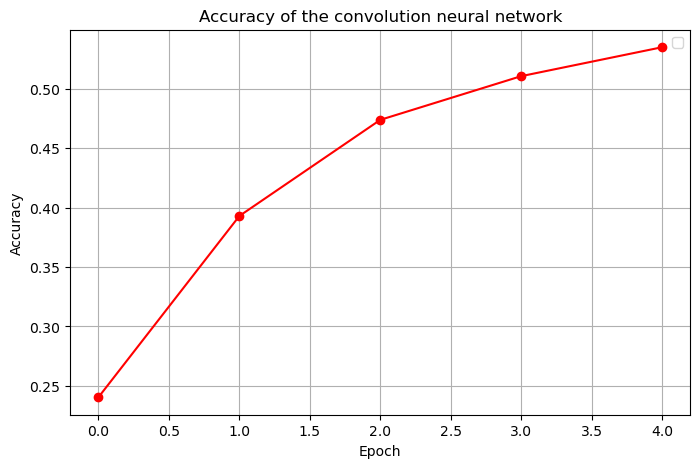

: 

: 

: 

: 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(cost, marker='o', linestyle='-', color='r', label='η = 1')
ax1.set_title('Convolutional Network Cost of mnist dataset')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Cost')
ax1.legend()
ax1.grid(True)

ax2.plot(accu, marker='o', linestyle='-', color='r', label='η = 1')
ax2.set_title('Convolutional Network Accuracy of mnist dataset')
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('Cost')
ax2.legend()
ax2.grid(True)
plt.savefig('../assets/TestingLearningRateSchedule.png')
plt.tight_layout()
plt.show()

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_18596\101289252.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


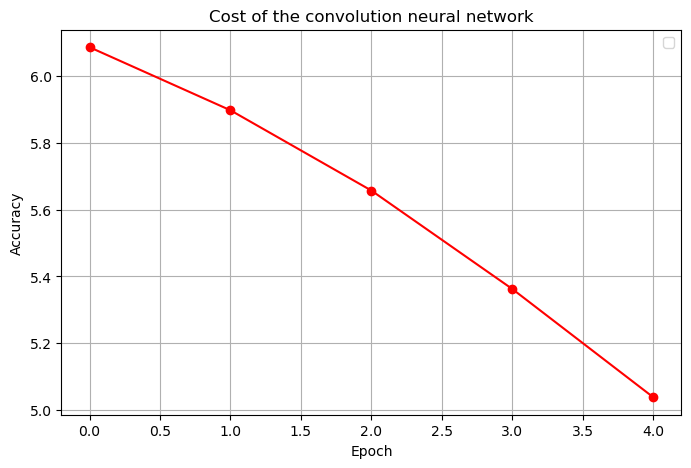

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cost, marker='o', linestyle='-', color='r')
plt.title('Cost of the convolution neural network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The main goal was to implement the algorithm in Python using NumPym but unfortunately, training the model takes too much time due to the inefficiency of the tools used in the programming process. Therefore, from now on, the TensorFlow library will be used instead to accelerate the testing process and experiment with different hyperparameters.

Let's compare the behavior of a RNN and CNN during the training process on the MNIST dataset.
The first step is to normalize the data, which is important to ensure that the agnitude of the features does not affect the training process or introduce bias.

In [4]:
from tensorflow import keras
from keras import layers
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images_rnn = train_images.reshape((60000, 28*28))
train_images_rnn = train_images_rnn.astype('float32')/255
test_images_rnn = test_images.reshape((10000, 28*28))
test_images_rnn = test_images_rnn.astype('float32')/255

In [5]:
model_1 = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model_1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model_metrics1 = model_1.fit(train_images_rnn, train_labels, epochs=12, batch_size=128)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9243 - loss: 0.2617
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9692 - loss: 0.1061
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0704
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9849 - loss: 0.0516
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0382
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9912 - loss: 0.0294
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9937 - loss: 0.0226
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9952 - loss: 0.0170
Epoch 9/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9967 - loss: 0.0126
Epoch 10/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9979 - loss: 0.0089
Epoch 11/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9985 - loss: 0.0071
Epoch 12/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

In [13]:
test_loss_1, test_accuracy_1 = model_1.evaluate(test_images_rnn, test_labels)

# Imprimir los resultados
print(f"Loss with the test data: {test_loss_1:.4f}")
print(f"Accuracy with the test data: {test_accuracy_1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0693
Loss with the test data: 0.0693
Accuracy with the test data: 0.9814


In [14]:
accu_model1 = model_metrics1.history['accuracy']
loss_model1 = model_metrics1.history['loss']
idx_max_acc = np.argmax(accu_model1)
idx_min_loss = np.argmin(loss_model1)
max_acc = round(accu_model1[idx_max_acc],4)
min_loss = round(loss_model1[idx_min_loss],4)

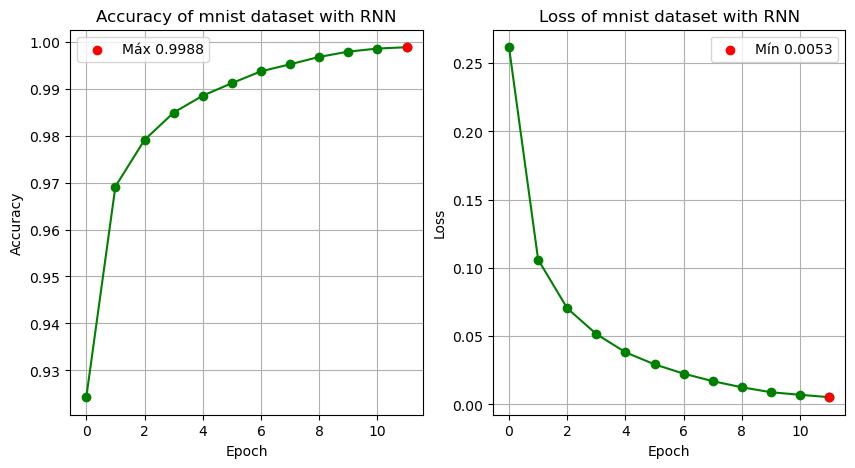

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model1, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc, color="red", zorder=5, label=f"Máx {max_acc}")
ax1.set_title('Accuracy of mnist dataset with RNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model1, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with RNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

Now let's train the convolutional neural network with a basic configuration, similar to the RNN, to compare how much epochs does it takes to achieve equal or better performance.

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_metrics_conv = model.fit(train_images, train_labels, epochs=12 ,batch_size=64)

Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9260 - loss: 0.2564
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9732 - loss: 0.0854
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9800 - loss: 0.0645
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9836 - loss: 0.0544
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0486
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9865 - loss: 0.0436
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9880 - loss: 0.0397
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9892 - loss: 0.0364
Epoch 9/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9896 - loss: 0.0334
Epoch 10/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9903 - loss: 0.0313
Epoch 11/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9912 - loss: 0.0296
Epoch 12/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

In [18]:
accu_model_conv = model_metrics_conv.history['accuracy']
loss_model_conv = model_metrics_conv.history['loss']
idx_max_acc = np.argmax(accu_model_conv)
idx_min_loss = np.argmin(loss_model_conv)
max_acc = round(accu_model_conv[idx_max_acc],4)
min_loss = round(loss_model_conv[idx_min_loss],4)

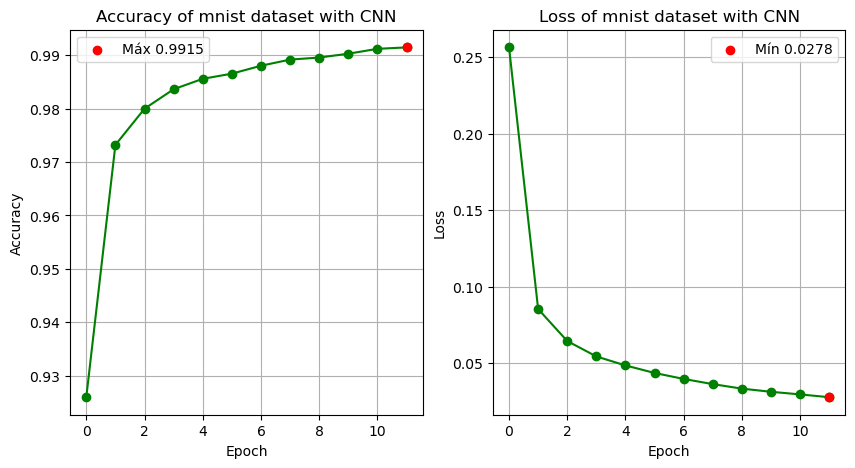

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model_conv, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc, color="red", zorder=5, label=f"Máx {max_acc}")
ax1.set_title('Accuracy of mnist dataset with CNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model_conv, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with CNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

Both models show similar performance, with the RNN achievin a sligthly better result, although the difference is not significant. Now, let's apply additional techniques to the CNN to achieve higher accuracy in epochs.

#### <font color=#A0A0A0> **🔘 Selection of hyperparameters**</font>

#### <font color=#A0A0A0> **🧐 Performance Summary**</font>

#### <font color=#A0A0A0> **🧐✅ Conclusions**</font>